In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np


city_daily_temperature_df = pd.read_csv("Datasets/city-daily-temperature.csv")
global_country_info_df = pd.read_csv("Datasets/global-country-information.csv")
print(city_daily_temperature_df.shape)
print(global_country_info_df.shape)

/var/folders/lb/lh1tm_b96cj5w3fqx388s3_r0000gn/T/ipykernel_45580/1994457971.py:9: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  city_daily_temperature_df = pd.read_csv("Datasets/city-daily-temperature.csv")


(2906327, 8)
(195, 35)


In [3]:
# Preprocessing City Daily Temperature
# We only want to look at data from 2000 onward 
city_daily_temperature_df = city_daily_temperature_df[city_daily_temperature_df['Year'] >= 2000]

# Filtering invlaid temperatures
city_daily_temperature_df = city_daily_temperature_df[city_daily_temperature_df['AvgTemperature'] <= 134]
city_daily_temperature_df = city_daily_temperature_df[city_daily_temperature_df['AvgTemperature'] != -99]

# Formatting the date 
city_daily_temperature_df['Date'] = pd.to_datetime(city_daily_temperature_df[['Year', 'Month', 'Day']], errors='coerce')

# Renaming countries
country_remappings = {
    'Congo': 'Democratic Republic of the Congo', 
    'US': 'United States',
    'The Netherlands' : 'Netherlands',
    'Equador' : 'Ecuador',
    'Myanmar (Burma)' : 'Myanmar',
    'Serbia-Montenegro' : 'Montenegro'
}
city_daily_temperature_df['Country'] = city_daily_temperature_df['Country'].replace(country_remappings)

# Organizing data 
avg_temp_per_year = city_daily_temperature_df.groupby('Year')['AvgTemperature'].mean().reset_index()
avg_temp_per_region_per_year = city_daily_temperature_df.groupby(['Region', 'Year'])['AvgTemperature'].mean().reset_index()
avg_temp_per_country_per_year = city_daily_temperature_df.groupby(['Country', 'Year'])['AvgTemperature'].mean().reset_index()
avg_temp_per_country_per_month = city_daily_temperature_df.groupby(['Country', 'Month'])['AvgTemperature'].mean().reset_index()

# Number of countries
# unique_countries = country_groups.keys()
# num_countries = len(unique_countries)

# print("Unique", unique_countries)
# print("Number of countries", num_countries)
# print("Average Temperature Per Year")
# print(avg_temp_per_year)
# print("Average Temperature Per Region by Year")
# print(avg_temp_per_region_per_year)
# print("Average Temperature Per Country by Year") 
# print(avg_temp_per_country_per_year)
# print("Average Temperature Per Country by Month")
# print(avg_temp_per_country_per_month)

In [4]:
# Preprocessing Global Country Information
# 2023 data
pd.set_option('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', None)
pd.options.mode.chained_assignment = None

#---------------------DROPPING UNNECESSARY COLUMNS---------------------
global_country_info_df.drop(['Fertility Rate','Population: Labor force participation (%)','Maternal mortality ratio','Unemployment rate','Gross tertiary education enrollment (%)','Gross primary education enrollment (%)','Density\n(P/Km2)','CPI','Abbreviation','Gasoline Price','Armed Forces size','CPI Change (%)','Latitude','Longitude','Tax revenue (%)','Calling Code','Currency-Code','Official language','Total tax rate', 'Physicians per thousand', 'Minimum wage', 'Out of pocket health expenditure',], axis = 1, inplace = True)

#---------------------FIXING COUNTIRES NAME ISSUES---------------------
global_country_info_df.loc[150, ['Country', 'Largest city', 'Capital/Major City']] = ['São Tomé and Príncipe', 'São Tomé', 'São Tomé']
global_country_info_df.loc[176, ['Capital/Major City', 'Largest city']] = ['Nuku\'alofa', 'Nuku\'alofa']
global_country_info_df.loc[181, 'Largest city'] = 'Funafuti'
global_country_info_df.loc[156, ['Capital/Major City', 'Largest city']] = ['Singapore', 'Singapore']
global_country_info_df.loc[97, ['Capital/Major City', 'Largest city']] = ['Tripoli', 'Tripoli']
global_country_info_df.loc[24, 'Largest city'] = 'Bandar Seri Begawan'
global_country_info_df.loc[120, 'Largest city'] = 'Denigomodu'
global_country_info_df.loc[175, ['Capital/Major City', 'Largest city']] = ['Lomé', 'Lomé']
global_country_info_df.loc[37, ['Capital/Major City', 'Largest city']] = ['Bogotá', 'Bogotá']
global_country_info_df.loc[40, ['Capital/Major City', 'Largest city']] = ['San José', 'San José']
global_country_info_df.loc[76, ['Capital/Major City', 'Largest city']] = ['Reykjavík', 'Reykjavík']
global_country_info_df.loc[104, ['Capital/Major City', 'Largest city']] = ['Malé', 'Malé']
global_country_info_df.loc[112, ['Capital/Major City', 'Largest city']] = ['Chișinău', 'Chișinău']
global_country_info_df.loc[23, ['Capital/Major City', 'Largest city']] = ['Brasília', 'São Paulo']
global_country_info_df.loc[31, ['Capital/Major City']] = ['Yaoundé']
global_country_info_df.loc[136, ['Capital/Major City']] = ['Asunción']
global_country_info_df.loc[43, ['Largest city']] = ['Nicosia']
global_country_info_df.loc[168, ['Largest city']] = ['Stockholm']
global_country_info_df.loc[169, ['Largest city']] = ['Zurich']
global_country_info_df.drop([133, 73], inplace=True) # Getting rid of countrys where majority/all of the data is missing

global_country_info_df['Population'] = global_country_info_df['Population'].str.replace(',', '', regex=False).astype(int)
global_country_info_df['GDP'] = global_country_info_df['GDP'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(int)
global_country_info_df['Agricultural Land( %)'] = pd.to_numeric(global_country_info_df['Agricultural Land( %)'].str.replace('%', ''), errors='coerce')
global_country_info_df['Forested Area (%)'] = pd.to_numeric(global_country_info_df['Forested Area (%)'].str.replace('%', ''), errors='coerce')



#---------------------FIXING MISSING CO2-EMMISIONS IN DATAFRAME---------------------
def replace_missing_co2(df):
    for index, row in df[df['Co2-Emissions'].isna()].iterrows():
        closest_country = df.loc[df['Co2-Emissions'].notna(), :] 
        population_diff = abs(closest_country['Population'] - row['Population'])
        gdp_diff = abs(closest_country['GDP'] - row['GDP']) 
        combined_diff = population_diff + gdp_diff
        closest_row = closest_country.loc[combined_diff.idxmin()]
        df.at[index, 'Co2-Emissions'] = closest_row['Co2-Emissions']    
    return df


#---------------------FIXING MISSING BIRTH RATES IN DATAFRAME---------------------
def replace_missing_birth_rate(df):
    for index, row in df[df['Birth Rate'].isna()].iterrows():
        closest_country = df.loc[df['Birth Rate'].notna(), :] 
        population_diff = abs(closest_country['Population'] - row['Population'])
        gdp_diff = abs(closest_country['GDP'] - row['GDP'])  # GDP is now a float
        combined_diff = population_diff + gdp_diff
        closest_row = closest_country.loc[combined_diff.idxmin()]
        df.at[index, 'Birth Rate'] = closest_row['Birth Rate']    
    return df

#---------------------FIXING MISSING URBAN POPULATION IN DATAFRAME---------------------
def replace_missing_urban(df):
    df['Urban_population'] = pd.to_numeric(df['Urban_population'].str.replace(',', ''), errors='coerce')
    for index, row in df[df['Urban_population'].isna()].iterrows():
        closest_country = df.loc[(df['Urban_population'].notna()) &  (df['Urban_population'] < df['Population']) & (df['Population'].notna()) ] 
        if closest_country.empty:
            continue  
        population_diff = closest_country['Population'] - row['Population']
        gdp_diff = closest_country['GDP'] - row['GDP'] 
        combined_diff = population_diff + gdp_diff
        sorted_indices = combined_diff.sort_values().index
        for idx in sorted_indices:
            closest_row = closest_country.loc[idx]
            if closest_row['Urban_population'] < row['Population']:
                df.at[index, 'Urban_population'] = closest_row['Urban_population']
                break
    return df

#---------------------FIXING MISSING LIFE EXPECTANCY IN DATAFRAME---------------------
def replace_missing_life_expectancy(df):
    for index, row in df[df['Life expectancy'].isna()].iterrows():
        closest_country = df.loc[df['Life expectancy'].notna(), :] 
        population_diff = abs(closest_country['Population'] - row['Population'])
        gdp_diff = abs(closest_country['GDP'] - row['GDP'])  
        combined_diff = population_diff + gdp_diff
        closest_row = closest_country.loc[combined_diff.idxmin()]
        df.at[index, 'Life expectancy'] = closest_row['Life expectancy']    
    return df

#---------------------FIXING MISSING INFANT MORTALITY IN DATAFRAME---------------------
def replace_missing_infant_mortality(df):
    for index, row in df[df['Infant mortality'].isna()].iterrows():
        closest_country = df.loc[df['Infant mortality'].notna(), :] 
        population_diff = abs(closest_country['Population'] - row['Population'])
        gdp_diff = abs(closest_country['GDP'] - row['GDP'])  
        combined_diff = population_diff + gdp_diff
        closest_row = closest_country.loc[combined_diff.idxmin()]
        df.at[index, 'Infant mortality'] = closest_row['Infant mortality']    
    return df

#---------------------FIXING MISSING INFANT MORTALITY IN DATAFRAME---------------------
def replace_missing_land(df):
    for index, row in df[df['Agricultural Land( %)'].isna()].iterrows():
        closest_country = df.loc[df['Agricultural Land( %)'].notna(), :] 
        population_diff = abs(closest_country['Population'] - row['Population'])
        gdp_diff = abs(closest_country['GDP'] - row['GDP']) 
        combined_diff = population_diff + gdp_diff
        closest_row = closest_country.loc[combined_diff.idxmin()]
        df.at[index, 'Agricultural Land( %)'] = closest_row['Agricultural Land( %)']
        df.at[index, 'Forested Area (%)'] = closest_row['Forested Area (%)']         
    return df

#---------------------FIXING PERCENTAGES IN DATAFRAME---------------------
def correct_land_percentages(global_country_info_df):
    rows_to_replace = global_country_info_df[(global_country_info_df['Agricultural Land( %)'] + global_country_info_df['Forested Area (%)']) > 100]
    for index, row in rows_to_replace.iterrows():
        closest_country = global_country_info_df.loc[(global_country_info_df['Agricultural Land( %)'].notna()) & (global_country_info_df['Forested Area (%)'].notna()) & (global_country_info_df.index != index) & ((global_country_info_df['Agricultural Land( %)'] + global_country_info_df['Forested Area (%)']) <= 100)]
        population_diff = abs(closest_country['Population'] - row['Population'])
        land_diff = abs((closest_country['Agricultural Land( %)'] + closest_country['Forested Area (%)']) - 100)
        combined_diff = population_diff + land_diff
        closest_row = closest_country.loc[combined_diff.idxmin()]
        global_country_info_df.at[index, 'Agricultural Land( %)'] = closest_row['Agricultural Land( %)']
        global_country_info_df.at[index, 'Forested Area (%)'] = closest_row['Forested Area (%)']
    return global_country_info_df

global_country_info_df = replace_missing_co2(global_country_info_df)
global_country_info_df = replace_missing_birth_rate(global_country_info_df)
global_country_info_df = replace_missing_urban(global_country_info_df)
global_country_info_df = replace_missing_life_expectancy(global_country_info_df)
global_country_info_df = replace_missing_infant_mortality(global_country_info_df)
global_country_info_df = replace_missing_land(global_country_info_df)
global_country_info_df = correct_land_percentages(global_country_info_df)
global_country_info_df['Land Area(Km2)'] = global_country_info_df['Land Area(Km2)'].str.replace(',', '', regex=False).astype(int)
global_country_info_df['Co2-Emissions'] = global_country_info_df['Co2-Emissions'].str.replace(',', '', regex=False).astype(int)
global_country_info_df['Urban_population'] = global_country_info_df["Urban_population"].astype(int)
global_country_info_df = global_country_info_df.sort_values(by='Co2-Emissions', ascending=False)
global_country_info_df = global_country_info_df[['Country','Capital/Major City','Largest city','Population','Urban_population','GDP','Land Area(Km2)','Agricultural Land( %)','Forested Area (%)','Birth Rate','Infant mortality','Life expectancy','Co2-Emissions']]
global_country_info_df = global_country_info_df.reset_index(drop=True)
global_country_info_df.index = range(1, len(global_country_info_df) + 1)
global_country_info_df

,Country,Capital/Major City,Largest city,Population,Urban_population,GDP,Land Area(Km2),Agricultural Land( %),Forested Area (%),Birth Rate,Infant mortality,Life expectancy,Co2-Emissions
1,China,Beijing,Shanghai,1397715000,842933962,19910000000000,9596960,56.2,22.4,10.90,7.4,77.0,9893038
2,United States,"Washington, D.C.",New York City,328239523,270663028,21427700000000,9833517,44.4,33.9,11.60,5.6,78.5,5006302
3,India,New Delhi,Kurebhar,1366417754,471031528,2611000000000,3287263,60.4,23.8,17.86,29.9,69.4,2407672
4,Russia,Moscow,Moscow,144373535,107683889,1699876578871,17098240,13.3,49.8,11.50,6.1,72.7,1732027
5,Japan,Tokyo,Tokyo,126226568,115782416,5081769542380,377944,12.3,68.5,7.40,1.8,84.2,1135886
6,Germany,Berlin,Berlin,83132799,64324835,3845630030824,357022,47.7,32.7,9.50,3.1,80.9,727973
7,Iran,Tehran,Tehran,82913906,62509623,445345282123,1648195,28.2,6.6,18.78,12.4,76.5,661710
8,South Korea,Seoul,Seoul,51709098,42106719,2029000000000,99720,17.4,63.4,6.40,2.7,82.6,620302
9,Saudi Arabia,Riyadh,Riyadh,34268528,28807838,792966838162,2149690,80.8,0.5,17.80,6.0,75.0,563449
10,Indonesia,Jakarta,Kalimantan,270203917,151509724,1119190780753,1904569,31.5,49.9,18.07,21.1,71.5,563325


In [5]:
# Combining the yearly average temperatures by country with the global country information
comined_yearly_df = pd.merge(global_country_info_df, avg_temp_per_country_per_year, on='Country')

In [6]:
# Combining the monthly average temperatures with the global country information
month_dict = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}
combined_monthly_df = pd.merge(global_country_info_df, avg_temp_per_country_per_month, on='Country')
combined_monthly_df['Month'] = combined_monthly_df['Month'].replace(month_dict)

In [7]:
# ANOVA: Country size (small, medium, and large) vs Co2 emissions

p-value: 0.0


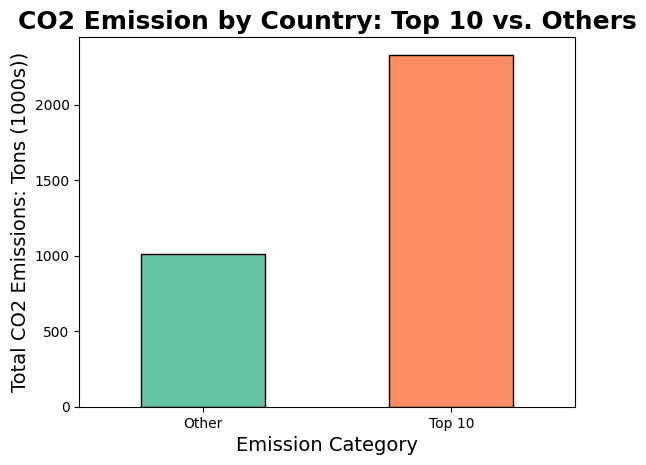

In [13]:
# Chi-Square: Top 10 countries by emission countries compare vs remaining countries
top_10 = global_country_info_df.sort_values(by='Co2-Emissions', ascending=False).head(10)
top_10_list = top_10['Country'].tolist()
global_country_info_df['EmissionCategory'] = global_country_info_df['Country'].apply(lambda x: 'Top 10' if x in top_10_list else 'Other')
merged_df = city_daily_temperature_df.merge(global_country_info_df[['Country', 'EmissionCategory']], on='Country', how='left')

merged_df['TempCategory'] = pd.cut(merged_df['AvgTemperature'], bins=[-np.inf, 10, 25, np.inf], labels=['Low', 'Medium', 'High'])
#merged_df['Co2-Emissions'] = merged_df['Co2-Emissions']/10000
contingency_table = pd.crosstab(merged_df['TempCategory'], merged_df['EmissionCategory'])

# Chi Square Test Result Statistic
from scipy.stats import chi2_contingency
chi2, p, dof,expected = chi2_contingency(contingency_table)
print(f'p-value: {p}')

# Bar Plot comparing CO2 Emissions
emissions_sums = global_country_info_df.groupby('EmissionCategory')['Co2-Emissions'].sum()/10000
emissions_sums.plot(kind='bar', color=['#66c2a5', '#fc8d62'], edgecolor='black')

plt.title('CO2 Emission by Country: Top 10 vs. Others', fontsize=18, weight='bold')
plt.xlabel('Emission Category', fontsize=14)
plt.ylabel('Total CO2 Emissions: Tons (1000s)', fontsize=14)
plt.xticks(rotation=0)
plt.show()

    Summary of Chi-Square
Summary: Our null hypothesis is that the size of a country does not directly influence its CO2 emissions. Our alternate hypothesis is that the size 
of a country does directly influence its CO2 emissions. From our Chi-Square Analysis we can see a **p-value of 0**. Because of these results, we can 
safely assume to reject our null hypothesis and assume that there is a directy influence between our two variables, the Top 10 countries and the remaining
countries, and their CO2 emissions.

In [9]:
# Z-Test: Average temperature vs Co2 emissions